In [206]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as mpatches
import seaborn as sns
import itertools
%matplotlib inline

import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected=True)

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
#from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
#import lightgbm as lgb
#from lightgbm import LGBMClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split
from scipy import interp
from sklearn.metrics import classification_report, accuracy_score, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix


import time
import warnings
warnings.filterwarnings("ignore")

In [26]:
df = pd.read_csv('datasets/creditcard.csv') 
print(df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [48]:
df.shape

(284807, 31)

In [49]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [50]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [51]:
df.isnull().sum().max() #To check NULL values

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [13]:
not_fraud = df[(df['Class'] == 0 )].count()[1]
fraud = df[(df['Class'] == 1 )].count()[1]
print('No. of Non-fraudalent Transactions: '+ str(not_fraud))
print('No. of Fraudalent Transactions: '+ str(fraud))

No. of Non-fraudalent Transactions: 284315
No. of Fraudalent Transactions: 492


In [14]:
print('Proportion of the classes in the data:')
print(df['Class'].value_counts()/len(df))

Proportion of the classes in the data:
0    0.998273
1    0.001727
Name: Class, dtype: float64


Only 492 (or 0.172%) of transaction are fraudulent. That means the data is highly imbalanced with respect with target variable Class.

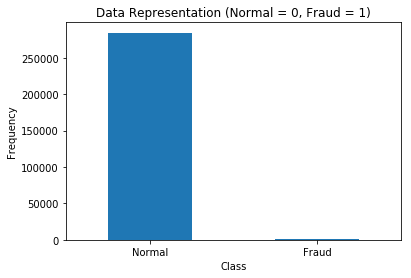

In [15]:
#Check data imbalance w.r.t target value: 'Class'

count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Data Representation (Normal = 0, Fraud = 1)")

LABELS = ["Normal", "Fraud"]
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

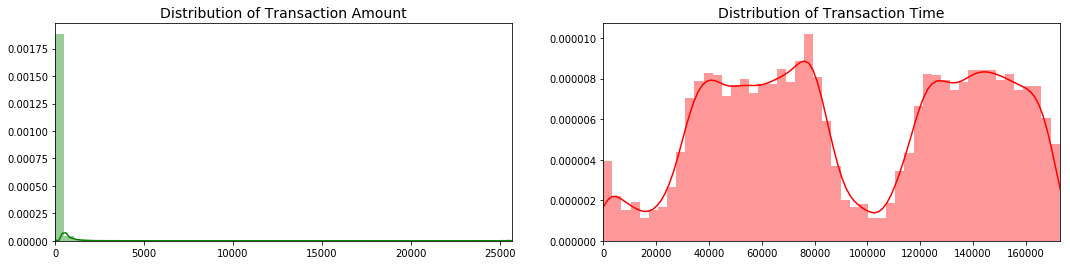

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='g')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='r')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [11]:
tmp = df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']

In [18]:
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [19]:
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [27]:
#Scaling the data

df['amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time', 'Amount'], axis = 1, inplace = True)

amount = df['amount']
time = df['time']

df.drop(['amount', 'time'], axis=1, inplace=True)
df.insert(0, 'time', time)
df.insert(1, 'amount', amount)

In [21]:
df.head(5)

,time,amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [41]:
# Since our classes are highly skewed, we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)


In [42]:
new_df.head(5)

,time,amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
243613,0.790752,-0.293440,2.093381,0.310462,-1.853761,1.210949,0.865303,-0.727841,0.688066,-0.430416,...,-0.229726,0.010964,0.332338,-0.093813,-0.681373,0.588535,-0.448649,-0.007517,-0.068268,0
81186,-0.303927,0.330329,-4.384221,3.264665,-3.077158,3.403594,-1.938075,-1.221081,-3.310317,-1.111975,...,-0.141533,2.076383,-0.990303,-0.330358,0.158378,0.006351,-0.493860,-1.537652,-0.994022,1
149039,0.068093,2.137637,-1.805996,0.459982,1.953530,-2.625042,-0.922326,0.493778,0.706715,-0.015229,...,0.173835,-0.270365,0.185801,-0.277511,0.437892,0.636195,0.585322,0.464027,0.084836,0
17317,-0.658690,1.089779,-27.848181,15.598193,-28.923756,6.418442,-20.346228,-4.828202,-19.210896,18.329406,...,1.697856,1.802149,-2.062934,-1.269843,0.165409,1.999499,-0.211059,1.324809,0.388090,1
6427,-0.905579,-0.293440,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,...,0.504646,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1


In [44]:
print(new_df['Class'].value_counts()/len(new_df)) #Equally Distributed

1    0.5
0    0.5
Name: Class, dtype: float64


In [64]:
new_df.shape

(984, 31)

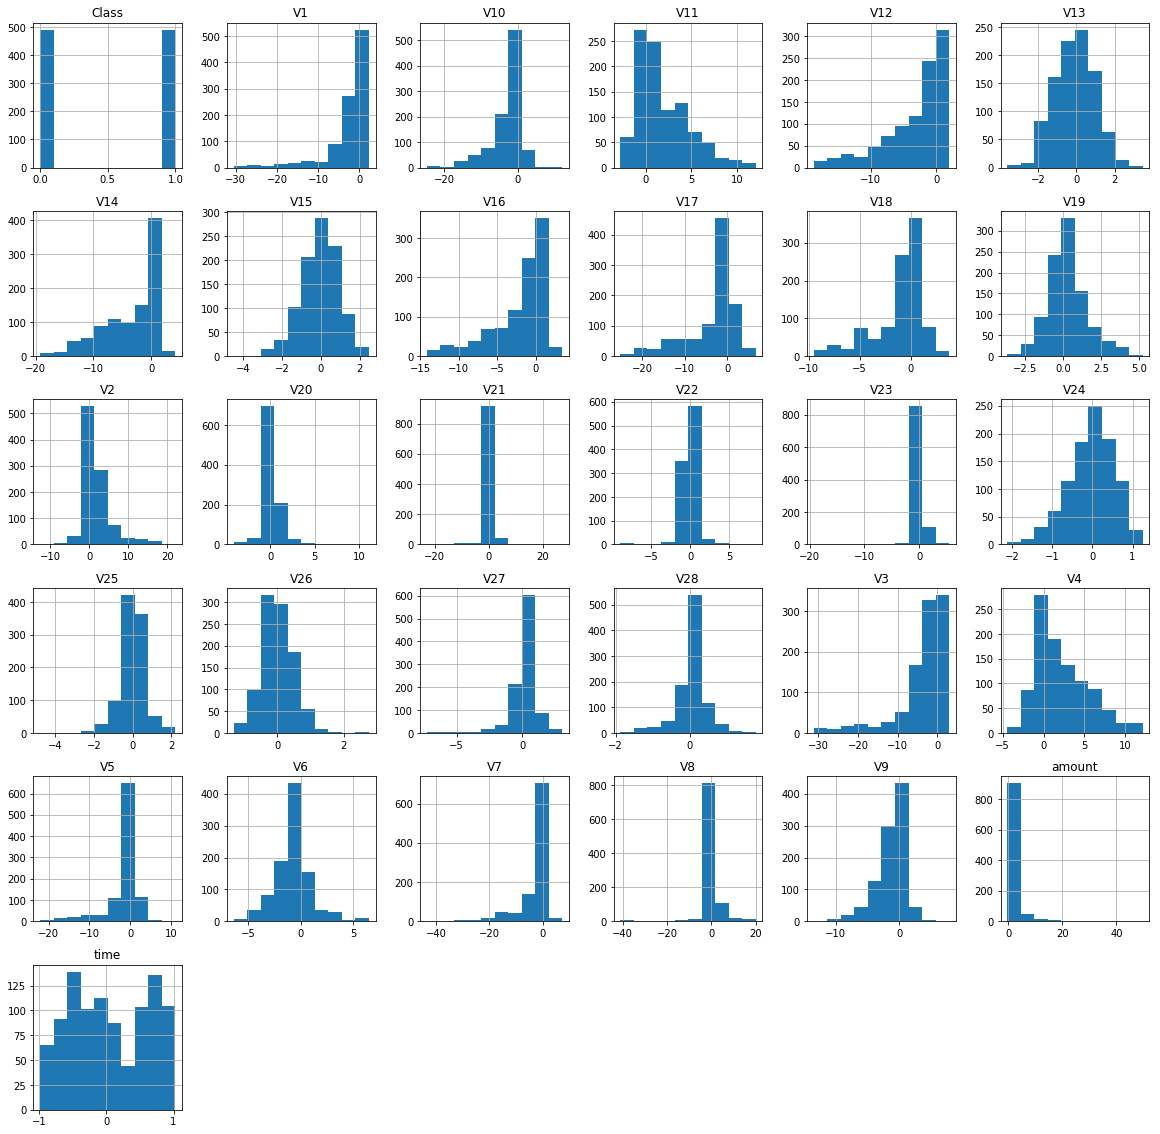

In [61]:
new_df.hist(figsize=(20,20))
plt.show()

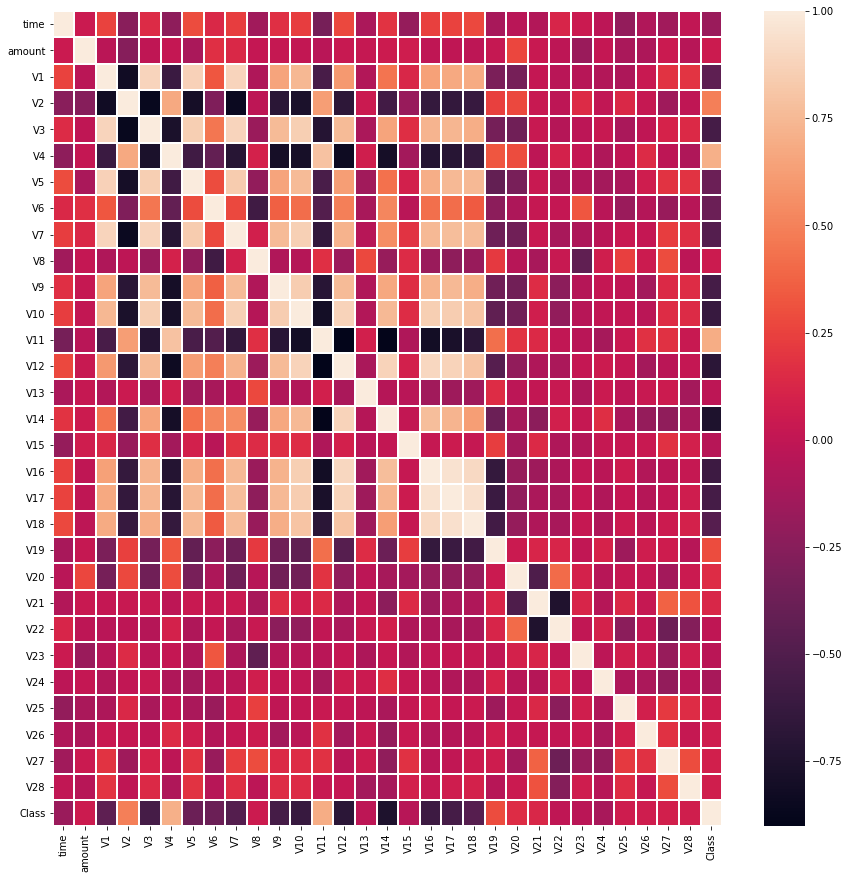

In [62]:
corr = new_df.corr()

# plot the heatmap
fig = plt.figure(figsize=(15,15))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            linewidths=1.0)

In [65]:
X = new_df.iloc[:,0:30].values
y = new_df.iloc[:,30].values

In [66]:
#Train-Test-Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, y_train.shape, X_test.shape , y_test.shape

((787, 30), (787,), (197, 30), (197,))

In [67]:
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (787, 30)
Number transactions y_train dataset:  (787,)
Number transactions X_test dataset:  (197, 30)
Number transactions y_test dataset:  (197,)


In [68]:
#SFS

def sfs_features(algo_namem,features_nums):
    sfs_name=SFS(algo_namem, 
                k_features=features_nums, 
                forward=True, 
                floating=False,
                scoring='accuracy',
                cv=5)
    return sfs_name

In [69]:
results_test = {}
results_train = {}
list_algos=[]

In [70]:
def predict(algo_name,X_train,y_train,X_test,y_test,atype='',verbose=0):
    algo_name.fit(X_train, y_train)
    Y_pred = algo_name.predict(X_test)
    acc_train = round(algo_name.score(X_train, y_train) * 100, 2)
    acc_val = round(algo_name.score(X_test, y_test) * 100, 2)
    
    results_test[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_val
    results_train[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_train
    list_algos.append(str(algo_name)[0:str(algo_name).find('(')])
    if verbose ==0:
        print("Training Accuracy: " + str(acc_train))
        print("Testing  Accuracy: "+ str(acc_val))
    else:
        return Y_pred

In [88]:
def features(sfs_name='sfs1',verbose=0):
    a= (sfs_name.k_feature_idx_[0],sfs_name.k_feature_idx_[1],sfs_name.k_feature_idx_[2])
    if verbose ==0:
        print('Selected features:', sfs_name.k_feature_idx_)
        for i in range (len (sfs_name.k_feature_idx_)):
            print (df.iloc[:,sfs_name.k_feature_idx_[i]].name)
    return a

In [109]:
def roc_graph_cv(algo_name,X,y,cvn=5):
    
    # Run classifier with cross-validation and plot ROC curves
    cv = StratifiedKFold(n_splits=cvn)
    classifier =algo_name

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    i = 0
    for train, test in cv.split(X, y):
        probas_ = classifier.fit(X[train], y[train].ravel()).predict_proba(X[test])
        # Compute ROC curve and area under curve
        fpr, tpr, thresholds = roc_curve(y[test].ravel(), probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()

In [90]:
# helping function

def conf(algo_name,X_test, y_test):
    y_pred = algo_name.predict(X_test)
    forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
    sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.title(str(algo_name)[0:str(algo_name).find('(')])

In [101]:
X = new_df.iloc[:,0:30].values
y = new_df.iloc[:,30].values


# T-SNE Implementation

X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)

# PCA Implementation

X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X)


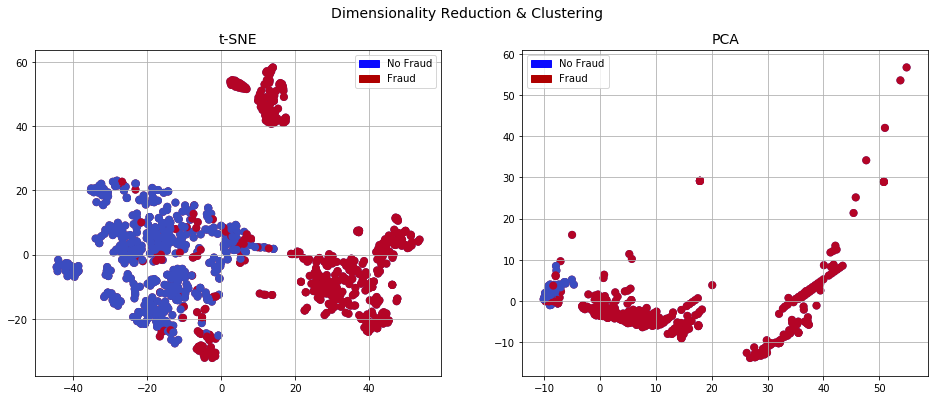

In [103]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
# labels = ['Normal', 'Fraud']
f.suptitle('Dimensionality Reduction & Clustering', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Normal', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Normal', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])


In [93]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
#principalComponents = pca.fit_transform(X)
#principalDf = pd.DataFrame(data = principalComponents
#             , columns = ['principal component 1', 'principal component 2'])
#finalDf = pd.concat([principalDf, df[['Class']]], axis = 1)

#fig = plt.figure(figsize = (8,6))
#ax = fig.add_subplot(1,1,1) 
#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
#ax.set_title('2 component PCA', fontsize = 20)
#targets = [0,1]
#colors = ['r',  'b']
#for Class, color in zip(targets,colors):
#    indicesToKeep = finalDf['Class'] == Class
#    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
#               , finalDf.loc[indicesToKeep, 'principal component 2']
#               , c = color
#              , s = 50)
#ax.legend(targets)
#ax.grid()

In [94]:
#LDA

lda = LinearDiscriminantAnalysis()
predict(lda,X_train,y_train,X_test,y_test)

Training Accuracy: 90.6
Testing  Accuracy: 93.4


In [104]:
#LDA with SFS

sfs_1 = sfs_features(lda,(1,5))
sfs_1 = sfs_1.fit(X, y)
selectedFeatures = features(sfs_1)

#plot3D(sfs_1.k_feature_idx_[0],sfs_1.k_feature_idx_[1],sfs_1.k_feature_idx_[2],'knn')

X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)
print ('\n')
predict(lda,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')

Selected features: (7, 10, 11, 15, 26)
V6
V9
V10
V14
V25


Training Accuracy: 90.22
Testing  Accuracy: 92.89


In [96]:
#lda.explained_variance_ratio_

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       106
           1       0.99      0.86      0.92        91

    accuracy                           0.93       197
   macro avg       0.94      0.92      0.93       197
weighted avg       0.93      0.93      0.93       197



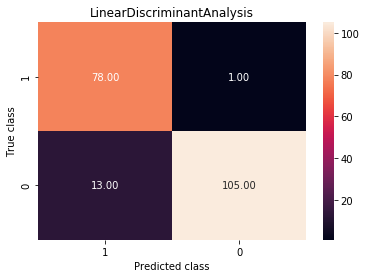

In [105]:
print(classification_report(y_test, lda.predict(X_test_sfs)))
conf(lda,X_test_sfs, y_test)

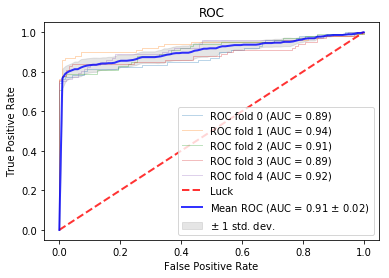

In [110]:
roc_graph_cv(lda,X[:,selectedFeatures],y)

In [115]:
X = new_df.iloc[:,0:30].values
y = new_df.iloc[:,30].values

In [130]:
# Random Forest Classifier

random_forest = RandomForestClassifier(n_estimators=250, random_state = 0)
predict(random_forest,X_train,y_train,X_test,y_test)

Training Accuracy: 100.0
Testing  Accuracy: 97.46


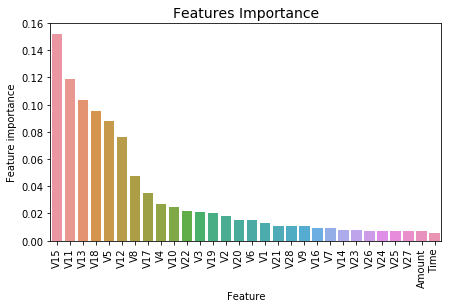

In [117]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

#Feature Importance

tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': random_forest.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Feature Importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [118]:
#Random Forest with SFS

sfs_1 = sfs_features(random_forest,(1,5))
sfs_1 = sfs_1.fit(X, y)
selectedFeatures = features(sfs_1)

#plot3D(sfs_1.k_feature_idx_[0],sfs_1.k_feature_idx_[1],sfs_1.k_feature_idx_[2],'knn')

X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)
print ('\n')
predict(random_forest,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')

Selected features: (1, 5, 13, 15, 19)
amount
V4
V12
V14
V18


Training Accuracy: 100.0
Testing  Accuracy: 97.97


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       106
           1       0.99      0.97      0.98        91

    accuracy                           0.98       197
   macro avg       0.98      0.98      0.98       197
weighted avg       0.98      0.98      0.98       197



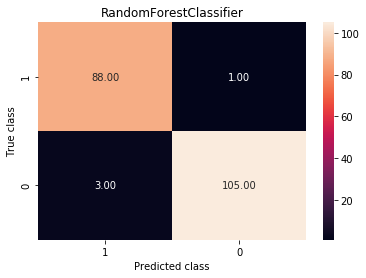

In [119]:
print(classification_report(y_test, random_forest.predict(X_test_sfs)))
conf(random_forest,X_test_sfs, y_test)

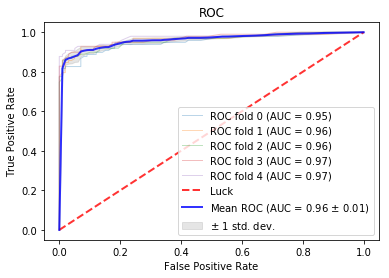

In [120]:
roc_graph_cv(random_forest,X[:,selectedFeatures],y)

In [121]:
#LogisticRegression

lr = LogisticRegression()
predict(lr,X_train,y_train,X_test,y_test)

Training Accuracy: 93.9
Testing  Accuracy: 96.95


## 'LogisticRegression' object has no attribute 'feature_importances_'

In [122]:
#Logistic with SFS

sfs_1 = sfs_features(lr,(1,5))
sfs_1 = sfs_1.fit(X, y)
selectedFeatures = features(sfs_1)

#plot3D(sfs_1.k_feature_idx_[0],sfs_1.k_feature_idx_[1],sfs_1.k_feature_idx_[2],'knn')

X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)
print ('\n')
predict(lr,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')

Selected features: (2, 5, 12, 13, 15)
V1
V4
V11
V12
V14


Training Accuracy: 92.76
Testing  Accuracy: 97.97


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       106
           1       0.98      0.98      0.98        91

    accuracy                           0.98       197
   macro avg       0.98      0.98      0.98       197
weighted avg       0.98      0.98      0.98       197



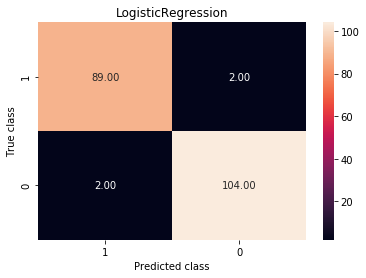

In [126]:
print(classification_report(y_test, lr.predict(X_test_sfs)))
conf(lr,X_test_sfs, y_test)

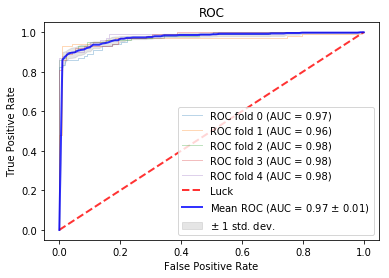

In [135]:
roc_graph_cv(lr,X[:,selectedFeatures],y)

In [129]:
#Extra Trees Classifier

etc = ExtraTreesClassifier(n_estimators=250, random_state=0)
predict(etc,X_train,y_train,X_test,y_test)

Training Accuracy: 100.0
Testing  Accuracy: 97.46


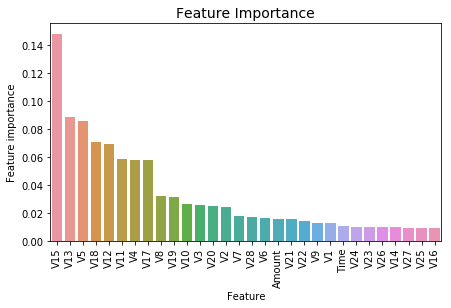

In [131]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

#Feature Importance

tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': etc.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Feature Importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [133]:
#Extra Trees Classifier with SFS

sfs_1 = sfs_features(etc,(1,5))
sfs_1 = sfs_1.fit(X, y)
selectedFeatures = features(sfs_1)

#plot3D(sfs_1.k_feature_idx_[0],sfs_1.k_feature_idx_[1],sfs_1.k_feature_idx_[2],'knn')

X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)
print ('\n')
predict(etc,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')

Selected features: (2, 5, 15, 17, 29)
V1
V4
V14
V16
V28


Training Accuracy: 100.0
Testing  Accuracy: 98.48


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       106
           1       0.99      0.98      0.98        91

    accuracy                           0.98       197
   macro avg       0.99      0.98      0.98       197
weighted avg       0.98      0.98      0.98       197



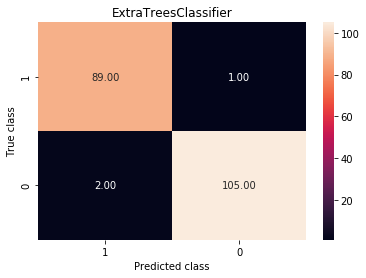

In [134]:
print(classification_report(y_test, etc.predict(X_test_sfs)))
conf(etc,X_test_sfs, y_test)

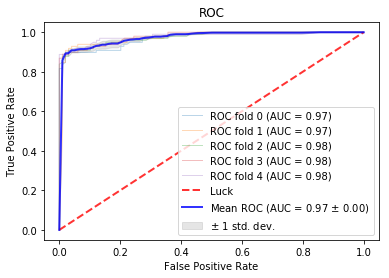

In [136]:
roc_graph_cv(etc,X[:,selectedFeatures],y)

In [137]:
#  Descion Tree

dect = tree.DecisionTreeClassifier()
predict(dect,X_train,y_train,X_test,y_test)

Training Accuracy: 100.0
Testing  Accuracy: 93.91


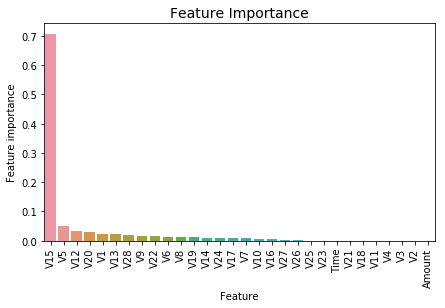

In [138]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

#Feature Importance

tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': dect.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Feature Importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [147]:
#Decision Tree with SFS

sfs_1 = sfs_features(dect,(1,5))
sfs_1 = sfs_1.fit(X, y)
selectedFeatures = features(sfs_1)

#plot3D(sfs_1.k_feature_idx_[0],sfs_1.k_feature_idx_[1],sfs_1.k_feature_idx_[2],'knn')

X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)
print ('\n')
predict(dect,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')

Selected features: (5, 15, 19, 24)
V4
V14
V18
V23


Training Accuracy: 100.0
Testing  Accuracy: 91.37


              precision    recall  f1-score   support

           0       0.96      0.88      0.92       106
           1       0.87      0.96      0.91        91

    accuracy                           0.91       197
   macro avg       0.91      0.92      0.91       197
weighted avg       0.92      0.91      0.91       197



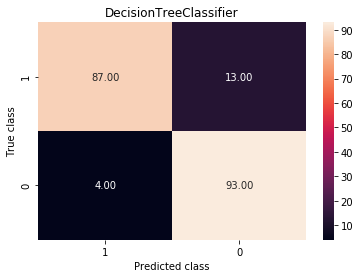

In [148]:
print(classification_report(y_test, dect.predict(X_test_sfs)))
conf(dect,X_test_sfs, y_test)

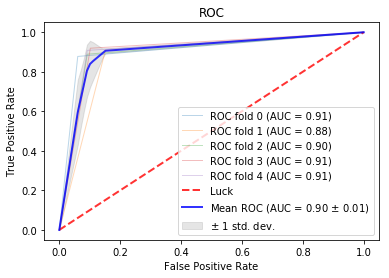

In [149]:
roc_graph_cv(dect,X[:,selectedFeatures],y)

In [166]:
#Support Vector Classifier_Linear

svc = SVC(kernel='linear', probability=True)
predict(svc,X_train,y_train,X_test,y_test, 'linear')

Training Accuracy: 94.16
Testing  Accuracy: 97.46


In [167]:
#Support Vector Classifier_Poly

svc = SVC(kernel='poly', probability=True)
predict(svc,X_train,y_train,X_test,y_test, 'poly')

Training Accuracy: 87.29
Testing  Accuracy: 89.85


In [168]:
#Support Vector Classifier_rbf

svc = SVC(kernel='rbf', probability=True)
predict(svc,X_train,y_train,X_test,y_test, 'rbf')

Training Accuracy: 93.01
Testing  Accuracy: 96.95


## 'SVC' object has no attribute 'feature_importance_'

In [169]:
#Support Vector Classifier with SFS

sfs_1 = sfs_features(svc,(1,5))
sfs_1 = sfs_1.fit(X, y)
selectedFeatures = features(sfs_1)

#plot3D(sfs_1.k_feature_idx_[0],sfs_1.k_feature_idx_[1],sfs_1.k_feature_idx_[2],'knn')

X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)
print ('\n')
predict(svc,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')

Selected features: (5, 8, 13, 15, 21)
V4
V7
V12
V14
V20


Training Accuracy: 92.88
Testing  Accuracy: 98.48


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       106
           1       0.99      0.98      0.98        91

    accuracy                           0.98       197
   macro avg       0.99      0.98      0.98       197
weighted avg       0.98      0.98      0.98       197



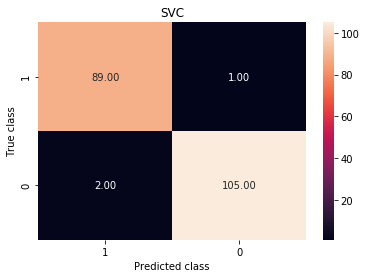

In [170]:
print(classification_report(y_test, svc.predict(X_test_sfs)))
conf(svc,X_test_sfs, y_test)

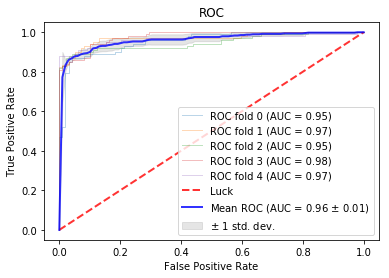

In [172]:
roc_graph_cv(svc,X[:,selectedFeatures],y)

In [150]:
# Gradient Boosting

gbc = GradientBoostingClassifier(loss='exponential', learning_rate=0.03, n_estimators=75 , max_depth=6)
predict(gbc,X_train,y_train,X_test,y_test)

Training Accuracy: 99.75
Testing  Accuracy: 93.91


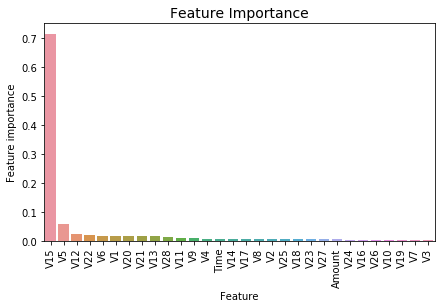

In [152]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

#Feature Importance

tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': gbc.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Feature Importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [151]:
# Gradient Boosting with SFS

sfs_1 = sfs_features(dect,(1,5))
sfs_1 = sfs_1.fit(X, y)
selectedFeatures = features(sfs_1)

#plot3D(sfs_1.k_feature_idx_[0],sfs_1.k_feature_idx_[1],sfs_1.k_feature_idx_[2],'knn')

X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)
print ('\n')
predict(dect,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')

Selected features: (4, 6, 9, 15, 29)
V3
V5
V8
V14
V28


Training Accuracy: 100.0
Testing  Accuracy: 90.86


              precision    recall  f1-score   support

           0       0.96      0.87      0.91       106
           1       0.86      0.96      0.91        91

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



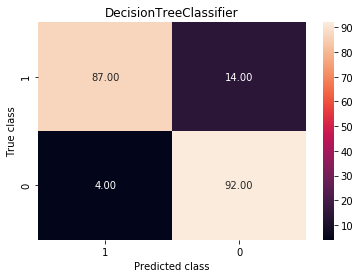

In [153]:
print(classification_report(y_test, dect.predict(X_test_sfs)))
conf(dect,X_test_sfs, y_test)

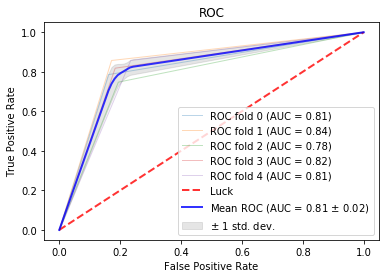

In [154]:
roc_graph_cv(dect,X[:,selectedFeatures],y)

In [180]:
#XGBoost

import xgboost as xgb

xg = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")
predict(xg,X_train,y_train,X_test,y_test)

Training Accuracy: 100.0
Testing  Accuracy: 95.94


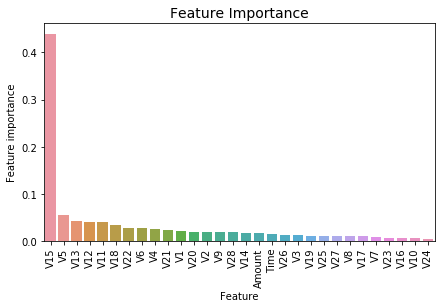

In [181]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

#Feature Importance

tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': xg.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Feature Importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [194]:
#XGBoost with SFS

sfs_1 = sfs_features(xg,(1,5))
sfs_1 = sfs_1.fit(X, y)
selectedFeatures = features(sfs_1)

#plot3D(sfs_1.k_feature_idx_[0],sfs_1.k_feature_idx_[1],sfs_1.k_feature_idx_[2],'knn')

X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)
print ('\n')
predict(xg,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')

Selected features: (5, 8, 11, 14, 15)
V4
V7
V10
V13
V14


Training Accuracy: 100.0
Testing  Accuracy: 94.42


              precision    recall  f1-score   support

           0       0.97      0.92      0.95       106
           1       0.92      0.97      0.94        91

    accuracy                           0.94       197
   macro avg       0.94      0.95      0.94       197
weighted avg       0.95      0.94      0.94       197



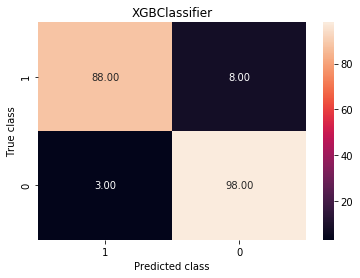

In [195]:
print(classification_report(y_test, xg.predict(X_test_sfs)))
conf(xg,X_test_sfs, y_test)

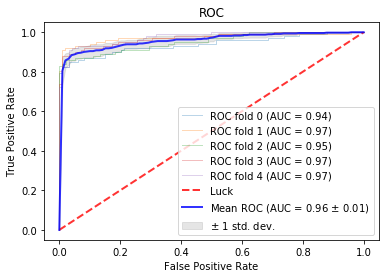

In [196]:
roc_graph_cv(xg,X[:,selectedFeatures],y)

In [188]:
#AdaBoost Classifier

ada = AdaBoostClassifier(n_estimators=100, random_state=0)
predict(ada,X_train,y_train,X_test,y_test)

Training Accuracy: 100.0
Testing  Accuracy: 93.4


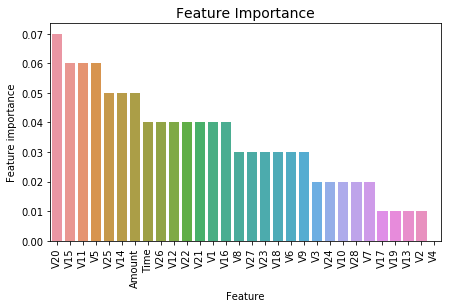

In [189]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

#Feature Importance

tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': ada.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Feature Importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [190]:
#AdaBoost with SFS

sfs_1 = sfs_features(ada,(1,5))
sfs_1 = sfs_1.fit(X, y)
selectedFeatures = features(sfs_1)

#plot3D(sfs_1.k_feature_idx_[0],sfs_1.k_feature_idx_[1],sfs_1.k_feature_idx_[2],'knn')

X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)
print ('\n')
predict(ada,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')

Selected features: (4, 5, 13, 15)
V3
V4
V12
V14


Training Accuracy: 97.2
Testing  Accuracy: 96.95


              precision    recall  f1-score   support

           0       0.98      0.96      0.97       106
           1       0.96      0.98      0.97        91

    accuracy                           0.97       197
   macro avg       0.97      0.97      0.97       197
weighted avg       0.97      0.97      0.97       197



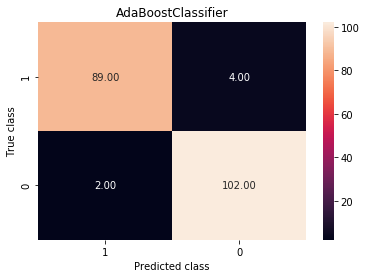

In [191]:
print(classification_report(y_test, ada.predict(X_test_sfs)))
conf(ada,X_test_sfs, y_test)

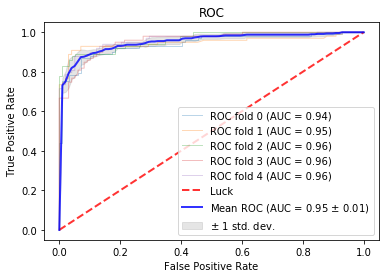

In [192]:
roc_graph_cv(ada,X[:,selectedFeatures],y)

The optimal number of neighbors is 2 with 92.5%


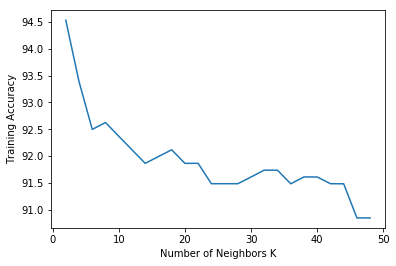

In [204]:
from sklearn import model_selection

#Neighbors
neighbors = [x for x in list(range(1,50)) if x % 2 == 0]

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
seed=123
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    #print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

    optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print(( "The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k])))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Training Accuracy')
plt.show()

In [200]:
# K Neighbours Classifier

knn = KNeighborsClassifier()
predict(knn,X_train,y_train,X_test,y_test)

Training Accuracy: 95.93
Testing  Accuracy: 95.94


## 'KNeighborsClassifier' object has no attribute 'feature_importances_'

In [201]:
# K Neighbours Classifier with SFS

sfs_1 = sfs_features(knn,(1,5))
sfs_1 = sfs_1.fit(X, y)
selectedFeatures = features(sfs_1)

#plot3D(sfs_1.k_feature_idx_[0],sfs_1.k_feature_idx_[1],sfs_1.k_feature_idx_[2],'knn')

X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)
print ('\n')
predict(knn,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')

Selected features: (2, 5, 15, 28)
V1
V4
V14
V27


Training Accuracy: 94.92
Testing  Accuracy: 95.43


              precision    recall  f1-score   support

           0       0.94      0.98      0.96       106
           1       0.98      0.92      0.95        91

    accuracy                           0.95       197
   macro avg       0.96      0.95      0.95       197
weighted avg       0.96      0.95      0.95       197



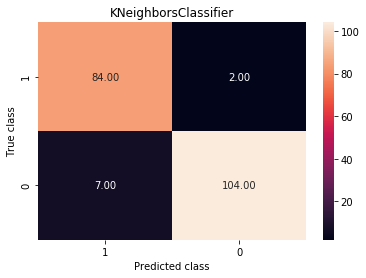

In [202]:
print(classification_report(y_test, knn.predict(X_test_sfs)))
conf(knn,X_test_sfs, y_test)

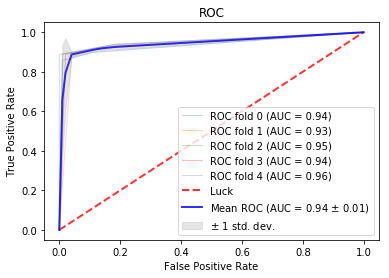

In [203]:
roc_graph_cv(knn,X[:,selectedFeatures],y)

In [207]:
# Gaussian Naive_bayes

g = GaussianNB()
predict(g,X_train,y_train,X_test,y_test)

Training Accuracy: 90.47
Testing  Accuracy: 95.43


## 'GaussianNB' object has no attribute 'feature_importances_'

In [214]:
# Gaussian Naive_bayes with SFS

sfs_1 = sfs_features(g,(1,5))
sfs_1 = sfs_1.fit(X, y)
selectedFeatures = features(sfs_1)

#plot3D(sfs_1.k_feature_idx_[0],sfs_1.k_feature_idx_[1],sfs_1.k_feature_idx_[2],'knn')

X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)
print ('\n')
predict(g,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')

Selected features: (0, 5, 15, 18)
time
V4
V14
V17


Training Accuracy: 91.99
Testing  Accuracy: 97.97


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       106
           1       0.98      0.98      0.98        91

    accuracy                           0.98       197
   macro avg       0.98      0.98      0.98       197
weighted avg       0.98      0.98      0.98       197



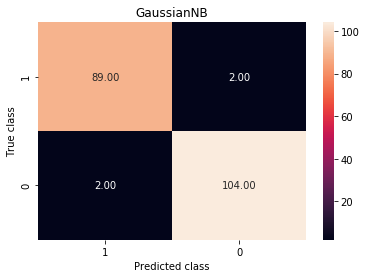

In [215]:
print(classification_report(y_test, g.predict(X_test_sfs)))
conf(g,X_test_sfs, y_test)

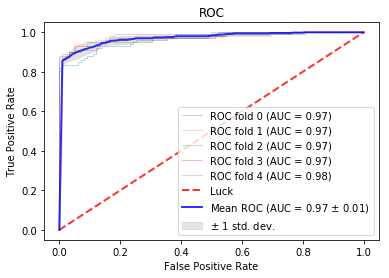

In [216]:
roc_graph_cv(g,X[:,selectedFeatures],y)

In [217]:
# print (results_test)

df_test =pd.DataFrame(list(results_test.items()),
                      columns=['Algorithm,'Test_Acc'])
df_train =pd.DataFrame(list(results_train.items()),
                      columns=['Algorithm','Train_Acc'])
df_results = df_test.join(df_train.set_index('Algorithm'), on='Algorithm')
df_results.sort_values('Test_Acc',ascending=False)

,Algorithm,Test_Acc,Train_Acc
12,SVC_sfs,98.48,92.88
7,ExtraTreesClassifier_sfs,98.48,100.00
5,LogisticRegression_sfs,97.97,92.76
24,GaussianNB_sfs,97.97,91.99
3,RandomForestClassifier_sfs,97.97,100.00
6,ExtraTreesClassifier_,97.46,100.00
2,RandomForestClassifier_,97.46,100.00
13,SVC_linear,97.46,94.16
4,LogisticRegression_,96.95,93.90
20,AdaBoostClassifier_sfs,96.95,97.20
